In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
image_set = pd.read_csv("faces.dat",sep="\s+",header=None)
image_set = image_set.to_numpy()

In [4]:
def show_ith_image(i, data):
    ith_image = data[i -1].reshape(64,64)

    plt.imshow(ith_image.T, cmap='gray')
    plt.show()

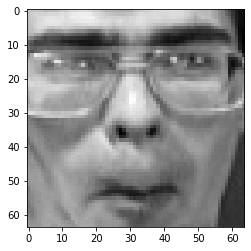

In [5]:
show_ith_image(200, image_set)

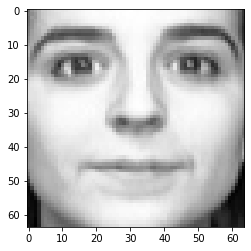

In [6]:
def remove_mean(data):
    return data - np.mean(data)
    
mean_centered_matrix = remove_mean(image_set)

show_ith_image(100, mean_centered_matrix)

In [7]:
image_set = pd.read_csv("faces.dat",sep="\s+",header=None)
image_set = image_set.to_numpy()

# xx^T -> size (4096, 4096)
# eigen_value, eigen_vector = eigen(x^Tx)
# eigen_value -> (4096,)
# eigen_vector -> (4096, 4096)

def remove_mean(data):
    return data - np.mean(data)

def convarience_matrix(data):
    return data @ data.T

def eigen(m):
    return np.linalg.eig(m)

mean_centered_matrix = remove_mean(image_set.T)
convarience = convarience_matrix(mean_centered_matrix)
eigen_value, eigen_vector = eigen(convarience)

/Users/dongbochen/Library/Python/3.8/lib/python/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-15.0, 400.0)

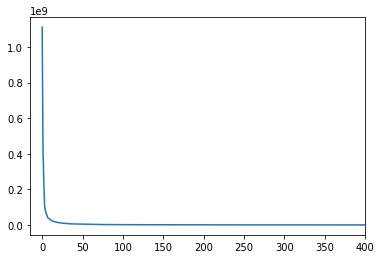

In [14]:
plt.plot(range(0, 4096), eigen_value)
plt.xlim(-15, 400)

Text(0.5, 0, '5')

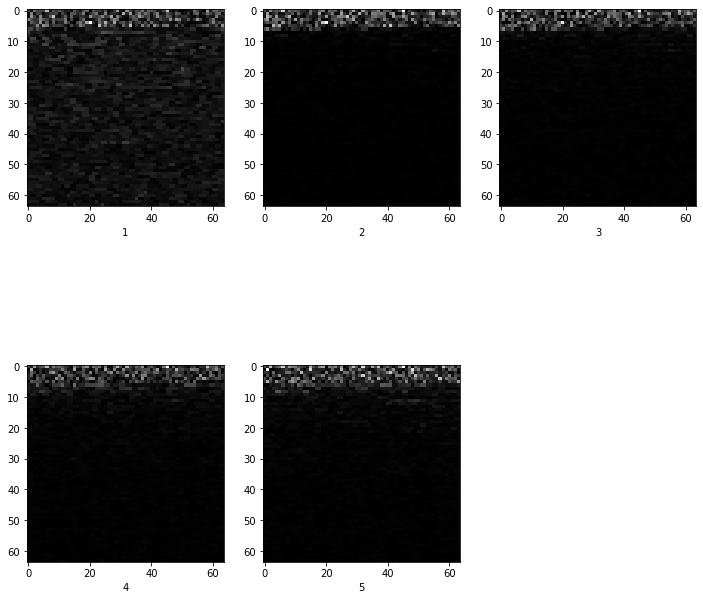

In [9]:
fig = plt.figure(figsize=(12,12))
fig.add_subplot(231)
plt.imshow(np.abs(eigen_vector[0].reshape(64, 64)), 'gray')
plt.xlabel(1)
fig.add_subplot(232)
plt.imshow(np.abs(eigen_vector[1].reshape(64, 64)), 'gray')
plt.xlabel(2)
fig.add_subplot(233)
plt.imshow(np.abs(eigen_vector[2].reshape(64, 64)), 'gray')
plt.xlabel(3)
fig.add_subplot(234)
plt.imshow(np.abs(eigen_vector[3].reshape(64, 64)), 'gray')
plt.xlabel(4)
fig.add_subplot(235)
plt.imshow(np.abs(eigen_vector[4].reshape(64, 64)), 'gray')
plt.xlabel(5)

In [10]:
from sklearn.decomposition import PCA

def reconstructed_with_pca(n):
    pca = PCA(n_components=n).fit(image_set)
    x_new = pca.transform (image_set)
    recdata = pca.inverse_transform(x_new)

    return recdata


In [11]:
reconstructed_10 = reconstructed_with_pca(10)
reconstructed_100 = reconstructed_with_pca(100)
reconstructed_200 = reconstructed_with_pca(200)
reconstructed_399 = reconstructed_with_pca(399)


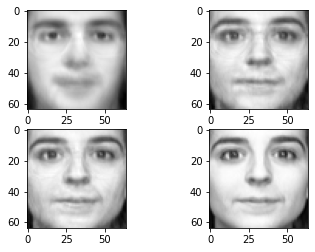

In [12]:
fig = plt.figure()
fig.add_subplot(221)   #top left
plt.imshow(reconstructed_10[99].reshape(64, 64).T, cmap='gray')
fig.add_subplot(222)   #top right
plt.imshow(reconstructed_100[99].reshape(64, 64).T, cmap='gray')
fig.add_subplot(223)   #bottom left
plt.imshow(reconstructed_200[99].reshape(64, 64).T, cmap='gray')
fig.add_subplot(224)   #bottom right 
plt.imshow(reconstructed_399[99].reshape(64, 64).T, cmap='gray')